In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits


In [35]:
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]


T = []
for s in subhalos:
    log = fits.open("/home/carlosmelo/Documents/GitHub/Illustris/my_illustris/TNG50-1-snap84-subhalo{}/imgs/log_img.fits".format(s))[1].data
    T.append(log["triaxiality_star"])

## 2.5R$_{\text{Eff}}$

In [2]:
# Column 0 for Jam result, Column 1 for Lens, 2 for Lens+shear, 3 for dyLens, 4 dyLens+shear 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos

    # intrinsic
Dstar  = np.empty([Nsubhalos,5])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,5])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,5])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,5])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction


In [3]:
    # Where to store the results
MMstar_jam    = np.empty([Nsubhalos, 3])        # JAM measurement of stellar mass 
MMstar_Lens   = np.empty([Nsubhalos, 3])        # Lens measurement of stellar mass
MMstar_Lens_shear = np.empty([Nsubhalos, 3])    # Lens+shear measurement of stellar mass
MMstar_dyLens = np.empty([Nsubhalos, 3])        # dyLens measurement of stellar mass
MMstar_dyLens_shear = np.empty([Nsubhalos, 3])  # dyLens+shear measurement of stellar mass

MMtotal_jam    = np.empty([Nsubhalos, 3])       # JAM measurement of total mass 
MMtotal_Lens   = np.empty([Nsubhalos, 3])       # Lens measurement of total mass 
MMtotal_Lens_shear = np.empty([Nsubhalos, 3])   # Lens+shear measurement of total mass 
MMtotal_dyLens = np.empty([Nsubhalos, 3])       # dyLens measurement of total mass 
MMtotal_dyLens_shear = np.empty([Nsubhalos, 3]) # dyLens+shear measurement of total mass 

MMdm_jam    = np.empty([Nsubhalos, 3])          # JAM measurement of dark matter mass
MMdm_Lens   = np.empty([Nsubhalos, 3])          # Lens measurement of dark matter mass
MMdm_Lens_shear = np.empty([Nsubhalos, 3])      # Lens+shear measurement of dark matter mass
MMdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter mass
MMdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter mass

MMfdm_jam    = np.empty([Nsubhalos, 3])          # JAM measurement of dark matter fraction
MMfdm_Lens   = np.empty([Nsubhalos, 3])          # Lens measurement of dark matter fraction
MMfdm_Lens_shear = np.empty([Nsubhalos, 3])      # Lens+shear measurement of dark matter fraction
MMfdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter fraction
MMfdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter fraction
    


In [14]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        jam = json.load(f)
        f.close()
        
    with open("./{}/model1/normal/no_shear/Lens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        Lens = json.load(f)
        f.close()
        
    with open("./{}/model1/normal/shear/Lens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        Lens_shear = json.load(f)
        f.close()
    
    with open("./{}/model1/normal/no_shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        dyLens_shear = json.load(f)
        f.close()
    
    Dstar[i][0] = jam["projDstar"]
    Dstar[i][1] = Lens["projDstar"]
    Dstar[i][2] = Lens_shear["projDstar"]
    Dstar[i][3] = dyLens["projDstar"]
    Dstar[i][4] = dyLens_shear["projDstar"]
    
    Ddm[i][0] = jam["projDdm"]
    Ddm[i][1] = Lens["projDdm"]
    Ddm[i][2] = Lens_shear["projDdm"]
    Ddm[i][3] = dyLens["projDdm"]
    Ddm[i][4] = dyLens_shear["projDdm"]
    
    Dtotal[i][0] = jam["projDtotal"]
    Dtotal[i][1] = Lens["projDtotal"]
    Dtotal[i][2] = Lens_shear["projDtotal"]
    Dtotal[i][3] = dyLens["projDtotal"]
    Dtotal[i][4] = dyLens_shear["projDtotal"]
    
    Dfdm[i][0] = jam["projDfdm"]
    Dfdm[i][1] = Lens["projDfdm"]
    Dfdm[i][2] = Lens_shear["projDfdm"]
    Dfdm[i][3] = dyLens["projDfdm"]
    Dfdm[i][4] = dyLens_shear["projDfdm"]    
    
    Mstar[i]  = dyLens["projMstar"]
    Mdm[i]    = dyLens["projMdm"]
    Mtotal[i] = dyLens["projMtotal"] 
    Mfdm[i]   = dyLens["projfdm"]
    
    MMstar_jam[i]    = jam["projMMstar"]
    MMstar_Lens[i]   = Lens["projMMstar"]
    MMstar_Lens_shear[i] = Lens_shear["projMMstar"]
    MMstar_dyLens[i] = dyLens["projMMstar"]
    MMstar_dyLens_shear[i] = dyLens_shear["projMMstar"]
    
    MMtotal_jam[i]    = jam["projMMtotal"]
    MMtotal_Lens[i]   = Lens["projMMtotal"]
    MMtotal_Lens_shear[i] = Lens_shear["projMMtotal"]
    MMtotal_dyLens[i] = dyLens["projMMtotal"]
    MMtotal_dyLens_shear[i] = dyLens_shear["projMMtotal"]
    
    MMdm_jam[i]    = jam["projMMdm"]
    MMdm_Lens[i]   = Lens["projMMdm"]
    MMdm_Lens_shear[i] = Lens_shear["projMMdm"]
    MMdm_dyLens[i] = dyLens["projMMdm"]
    MMdm_dyLens_shear[i] = dyLens_shear["projMMdm"]
    
    MMfdm_jam[i]    = jam["projMfdm"]
    MMfdm_Lens[i]   = Lens["projMfdm"]
    MMfdm_Lens_shear[i] = Lens_shear["projMfdm"]
    MMfdm_dyLens[i] = dyLens["projMfdm"]
    MMfdm_dyLens_shear[i] = dyLens_shear["projMfdm"]
    


In [19]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

def make_plot(dataset_true, 
              dataset_jam, 
              dataset_Lens, dataset_Lens_shear,
              dataset_dyLens, dataset_dyLens_shear,
                diff_dataset,
                 title, label, fdm=False):

    plt.figure(figsize=(15,8))
    plt.suptitle(title, fontsize=14)

    plt.subplot(121)
    MM_jam_u          = np.diff(dataset_jam, axis=1)
    MM_Lens_u         = np.diff(dataset_Lens, axis=1)
    MM_Lens_shear_u   = np.diff(dataset_Lens_shear, axis=1)
    MM_dyLens_u       = np.diff(dataset_dyLens, axis=1)
    MM_dyLens_shear_u = np.diff(dataset_dyLens_shear, axis=1)

    plt.scatter(x=dataset_true, y=dataset_jam[:,1], s=10, color="orange", label="JAM")
    plt.errorbar(x=dataset_true, y=dataset_jam[:,1], yerr=MM_jam_u.T, ls="None", color="orange")
    
    plt.scatter(x=dataset_true, y=dataset_Lens[:,1], s=10, color="teal", label="Lens")
    plt.errorbar(x=dataset_true, y=dataset_Lens[:,1], yerr=MM_Lens_u.T, ls="None", color="teal")
    
    plt.scatter(x=dataset_true, y=dataset_Lens_shear[:,1], s=10, color="gray", label="Lens+shear")
    plt.errorbar(x=dataset_true, y=dataset_Lens_shear[:,1], yerr=MM_Lens_shear_u.T, ls="None", color="gray")

    plt.scatter(x=dataset_true, y=dataset_dyLens[:,1], s=10, color="indianred", label="dyLens")
    plt.errorbar(x=dataset_true, y=dataset_dyLens[:,1], yerr=MM_dyLens_u.T, ls="None", color="indianred")

    plt.scatter(x=dataset_true, y=dataset_dyLens_shear[:,1], s=10, color="royalblue", label="dyLens+shear")
    plt.errorbar(x=dataset_true, y=dataset_dyLens_shear[:,1], yerr=MM_dyLens_shear_u.T, ls="None", color="royalblue")

    r = np.linspace(dataset_true.min(), dataset_true.max())
    plt.plot(r, r, color="gray", linestyle="--")

    plt.legend(fontsize=13)
    if fdm:
        plt.xlabel(r"Input $f_{DM}$",  size=14)
        plt.ylabel(r"Output $f_{DM}$",  size=14)
    else:       
        plt.xlabel(r"Input [${\log_{10}(M/M_{\odot})}]$",  size=14)
        plt.ylabel(r"Output [${\log_{10}(M/M_{\odot})}]$",  size=14)



    plt.subplot(122)
    m, hi, lo = median_hi_lo(diff_dataset[:,0])
    _ = plt.hist(diff_dataset[:,0], bins=5, density=False,  color="orange",
                 label="JAM: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    m, hi, lo = median_hi_lo(diff_dataset[:,1])
    _ = plt.hist(diff_dataset[:,1], bins=5, density=False,  color="teal",
                 label="Lens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    m, hi, lo = median_hi_lo(diff_dataset[:,2])
    _ = plt.hist(diff_dataset[:,2], bins=5, density=False,  color="gray",
                 label="Lens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    m, hi, lo = median_hi_lo(diff_dataset[:,3])
    _ = plt.hist(diff_dataset[:,3], bins=5, density=False, alpha=0.8, color="indianred",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    m, hi, lo = median_hi_lo(diff_dataset[:,4])
    _ = plt.hist(diff_dataset[:,4], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    plt.legend(fontsize=13)
    plt.xlabel(label, size=14)
    plt.ylabel("#Number of subhalos", size=14)

    plt.xticks(size=12)
    plt.yticks(size=12)


    plt.tight_layout()

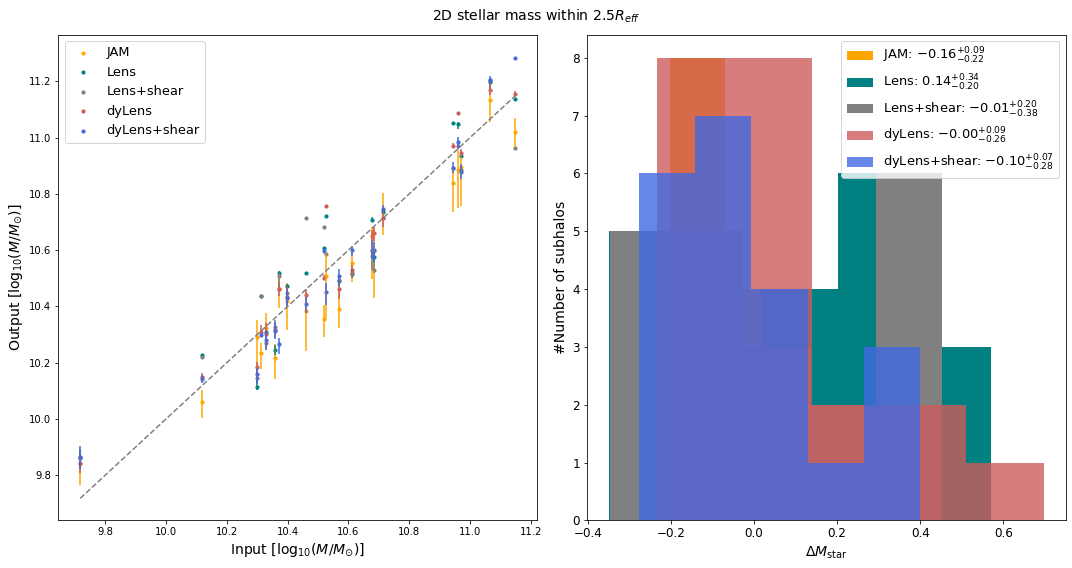

In [20]:
    # Stellar mass plot
make_plot(dataset_true=Mstar,
          dataset_jam=MMstar_jam, 
          dataset_Lens=MMstar_Lens, dataset_Lens_shear=MMstar_Lens_shear,
          dataset_dyLens=MMstar_dyLens, 
          dataset_dyLens_shear=MMstar_dyLens_shear,
          diff_dataset=Dstar,
         title=r"2D stellar mass within $2.5R_{eff}$", label=r"${\Delta M_{\rm star}}$")

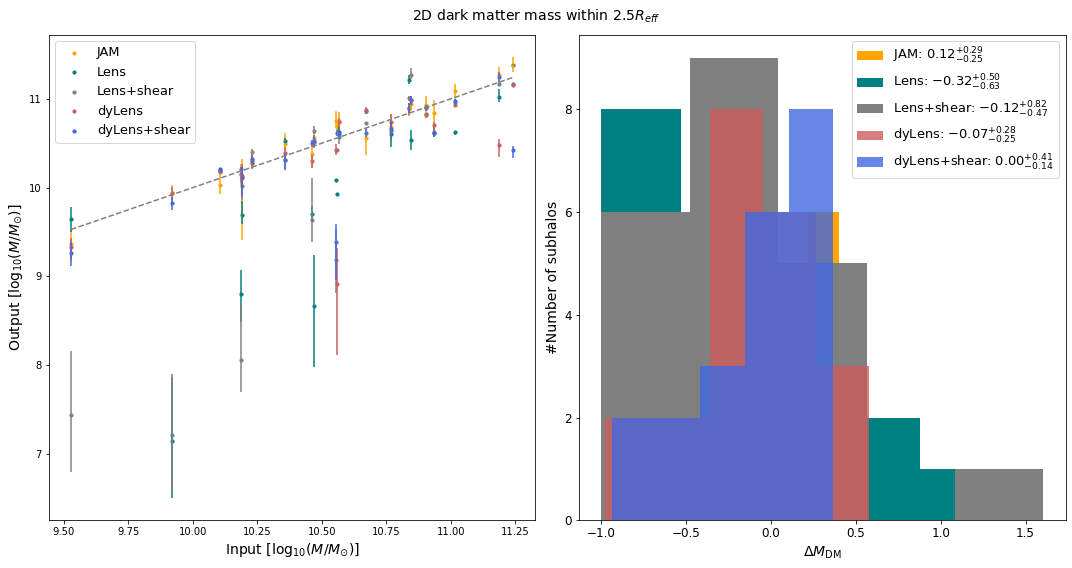

In [21]:
    # Dark matter mass
make_plot(dataset_true=Mdm,
          dataset_jam=MMdm_jam, 
          dataset_Lens=MMdm_Lens, dataset_Lens_shear=MMdm_Lens_shear,
          dataset_dyLens=MMdm_dyLens,
          dataset_dyLens_shear=MMdm_dyLens_shear,
          diff_dataset=Ddm,
         title=r"2D dark matter mass within $2.5R_{eff}$", label=r"${\Delta M_{\rm DM}}$")

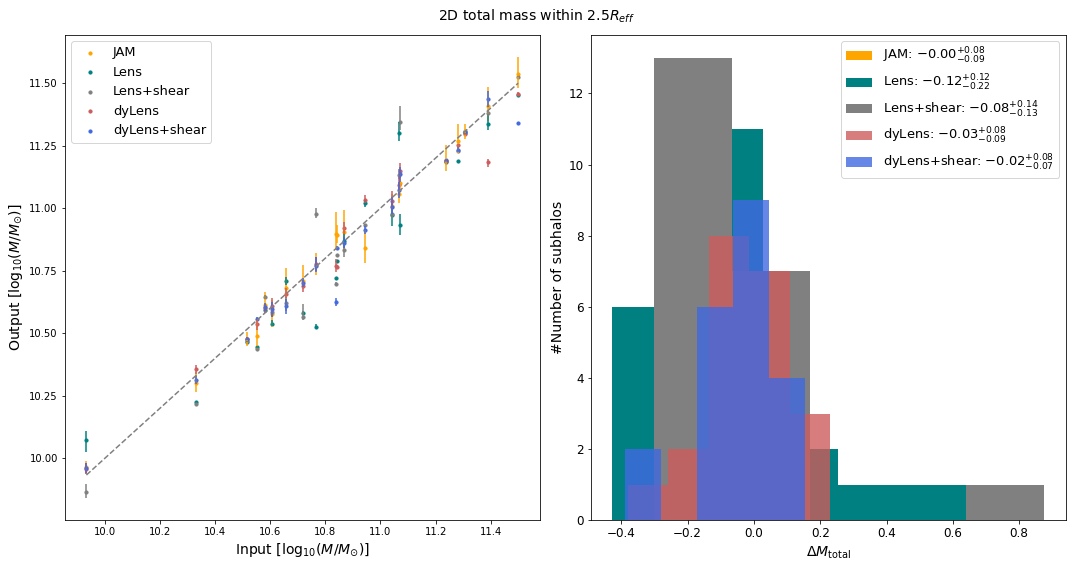

In [22]:
    # Total mass
make_plot(dataset_true=Mtotal,
          dataset_jam=MMtotal_jam, 
          dataset_Lens=MMtotal_Lens, dataset_Lens_shear=MMtotal_Lens_shear,
          dataset_dyLens=MMtotal_dyLens,
          dataset_dyLens_shear=MMtotal_dyLens_shear,
          diff_dataset=Dtotal,
         title=r"2D total mass within $2.5R_{eff}$", label=r"${\Delta M_{\rm total}}$")

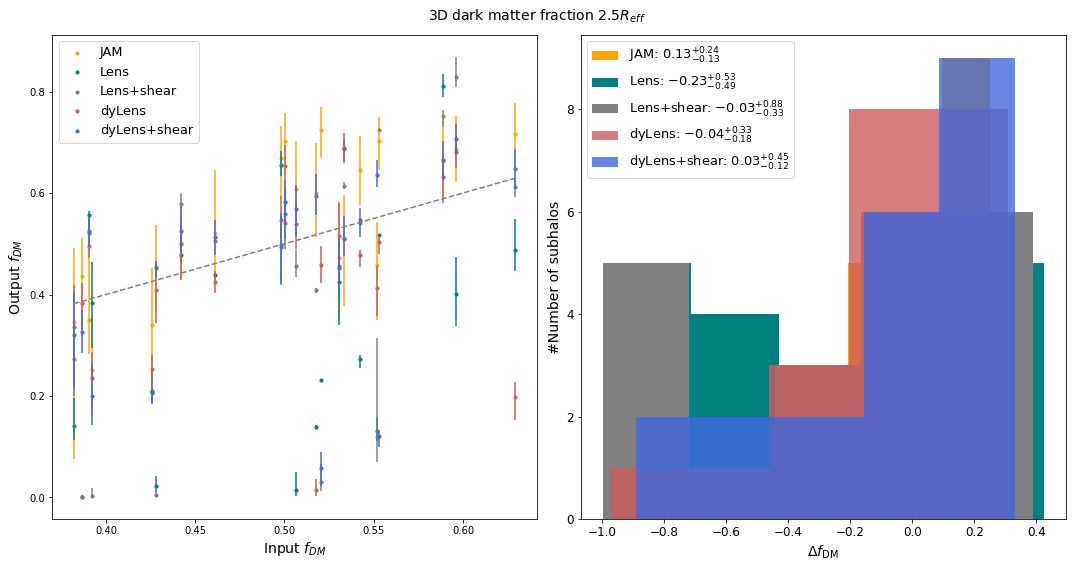

In [23]:
    # Dark matter fraction
make_plot(dataset_true=Mfdm,
          dataset_jam=MMfdm_jam, 
          dataset_Lens=MMfdm_Lens, dataset_Lens_shear=MMfdm_Lens_shear,
          dataset_dyLens=MMfdm_dyLens,
          dataset_dyLens_shear=MMfdm_dyLens_shear,
          diff_dataset=Dfdm,
         title=r"2D dark matter fraction $2.5R_{eff}$", label=r"${\Delta f_{\rm DM}}$", fdm=True)

In [24]:
results_2D = np.stack([Dstar, Ddm, Dtotal, Dfdm])

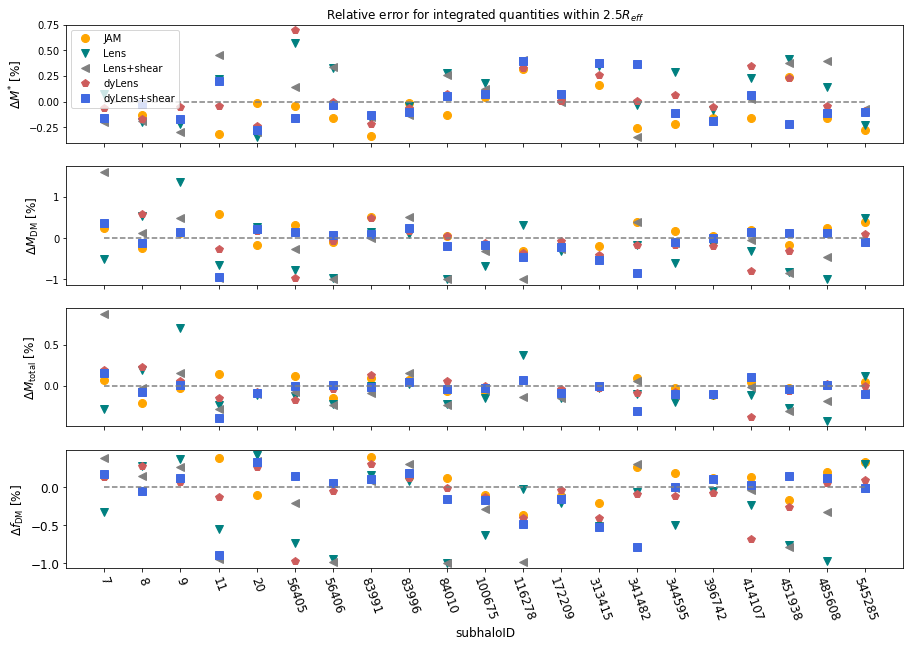

In [25]:
fig, axes = plt.subplots(4, figsize=(15, 10), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]
x = np.arange(0, Nsubhalos, 1)   # just to plot


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results_2D[i][:,0], "o", label="JAM", markersize=8, color="orange")
    ax.plot(x, results_2D[i][:,1], "v", label="Lens", markersize=8, color="teal")
    ax.plot(x, results_2D[i][:,2], "<", label="Lens+shear", markersize=8, color="gray")
    ax.plot(x, results_2D[i][:,3], "p", label="dyLens", markersize=8, color="indianred")
    ax.plot(x, results_2D[i][:,4], "s", label="dyLens+shear", markersize=8, color="royalblue")
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${2.5 R_{eff}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

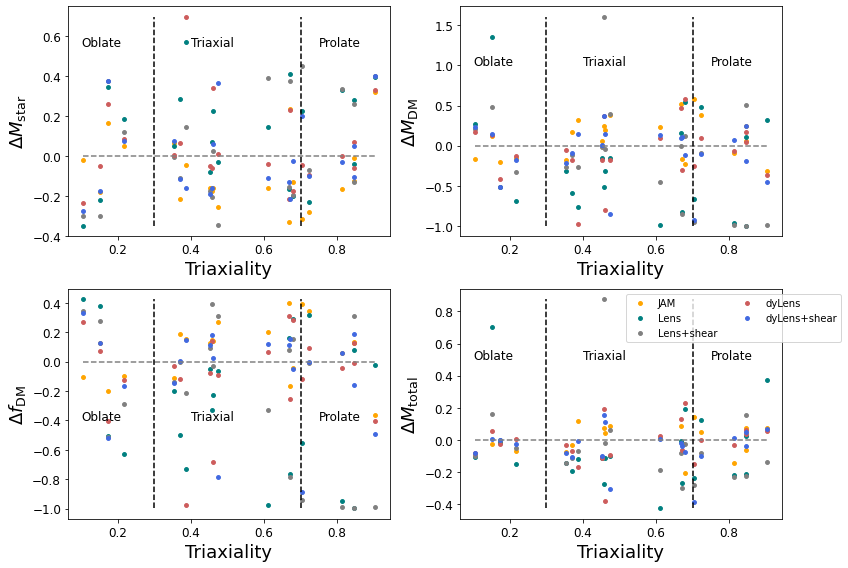

In [61]:
# Column 0 for Jam result, Column 1 for Lens, 2 for Lens+shear, 3 for dyLens, 4 dyLens+shear 

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
axs[0, 0].scatter(x=T, y=Dstar[:,0], s=15, color="orange", label="JAM")
axs[0, 0].scatter(x=T, y=Dstar[:,1], s=15, color="teal", label="Lens")
axs[0, 0].scatter(x=T, y=Dstar[:,2], s=15, color="gray", label="Lens+shear")
axs[0, 0].scatter(x=T, y=Dstar[:,3], s=15, color="indianred", label="dyLens")
axs[0, 0].scatter(x=T, y=Dstar[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[0, 0].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[0, 0].set_xlabel('Triaxiality', size=18)
axs[0, 0].set_ylabel(r"${\Delta M_{\rm star}}$", size=18)

ymin = results_2D[0].min()
ymax = results_2D[0].max()

axs[0, 0].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 0].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 0].text(y=0.55, x=0.1, s='Oblate', size=12)
axs[0, 0].text(y=0.55, x=0.75, s='Prolate', size=12)
axs[0, 0].text(y=0.55, x=0.40, s='Triaxial', size=12)
#axs[0, 0].legend()

    # DM mass
axs[0, 1].scatter(x=T, y=Ddm[:,0], s=15, color="orange", label="JAM")
axs[0, 1].scatter(x=T, y=Ddm[:,1], s=15, color="teal", label="Lens")
axs[0, 1].scatter(x=T, y=Ddm[:,2], s=15, color="gray", label="Lens+shear")
axs[0, 1].scatter(x=T, y=Ddm[:,3], s=15, color="indianred", label="dyLens")
axs[0, 1].scatter(x=T, y=Ddm[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[0, 1].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[0, 1].set_xlabel('Triaxiality', size=18)
axs[0, 1].set_ylabel(r"${\Delta M_{\rm DM}}$", size=18)

ymin = results_2D[1].min()
ymax = results_2D[1].max()

axs[0, 1].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 1].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 1].text(y=1.0, x=0.1, s='Oblate', size=12)
axs[0, 1].text(y=1.0, x=0.75, s='Prolate', size=12)
axs[0, 1].text(y=1.0, x=0.40, s='Triaxial', size=12)

 # DM fraction
axs[1, 0].scatter(x=T, y=Dfdm[:,0], s=15, color="orange", label="JAM")
axs[1, 0].scatter(x=T, y=Dfdm[:,1], s=15, color="teal", label="Lens")
axs[1, 0].scatter(x=T, y=Dfdm[:,2], s=15, color="gray", label="Lens+shear")
axs[1, 0].scatter(x=T, y=Dfdm[:,3], s=15, color="indianred", label="dyLens")
axs[1, 0].scatter(x=T, y=Dfdm[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[1, 0].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[1, 0].set_xlabel('Triaxiality', size=18)
axs[1, 0].set_ylabel(r"${\Delta f_{\rm DM}}$", size=18)

ymin = results_2D[3].min()
ymax = results_2D[3].max()

axs[1, 0].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 0].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 0].text(y=-0.4, x=0.1, s='Oblate', size=12)
axs[1, 0].text(y=-0.4, x=0.75, s='Prolate', size=12)
axs[1, 0].text(y=-0.4, x=0.40, s='Triaxial', size=12)


 # Total mass
axs[1, 1].scatter(x=T, y=Dtotal[:,0], s=15, color="orange", label="JAM")
axs[1, 1].scatter(x=T, y=Dtotal[:,1], s=15, color="teal", label="Lens")
axs[1, 1].scatter(x=T, y=Dtotal[:,2], s=15, color="gray", label="Lens+shear")
axs[1, 1].scatter(x=T, y=Dtotal[:,3], s=15, color="indianred", label="dyLens")
axs[1, 1].scatter(x=T, y=Dtotal[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[1, 1].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[1, 1].set_xlabel('Triaxiality', size=18)
axs[1, 1].set_ylabel(r"${\Delta M_{\rm total}}$", size=18)
axs[1, 1].legend(ncol=2, loc='upper left', bbox_to_anchor=(0.50, 1.0))


ymin = results_2D[2].min()
ymax = results_2D[2].max()

axs[1, 1].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 1].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 1].text(y=0.5, x=0.1, s='Oblate', size=12)
axs[1, 1].text(y=0.5, x=0.75, s='Prolate', size=12)
axs[1, 1].text(y=0.5, x=0.40, s='Triaxial', size=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

---

# R$_{\text{Einstein}}$

In [63]:
# Column 0 for Jam result, Column 1 for Lens, 2 for Lens+shear, 3 for dyLens, 4 dyLens+shear 
Nsubhalos = len(subhalos)  # Number of subhalos

    # intrinsic
Dstar  = np.empty([Nsubhalos,5])   # Fractional difference in stellar mass
Ddm    = np.empty([Nsubhalos,5])   # Fractional difference in dm mass
Dtotal = np.empty([Nsubhalos,5])   # Fractional difference in total mass
Dfdm   = np.empty([Nsubhalos,5])   # Fractional difference in dm fraction

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction


In [64]:
    # Where to store the results
MMstar_Lens   = np.empty([Nsubhalos, 3])        # Lens measurement of stellar mass
MMstar_Lens_shear = np.empty([Nsubhalos, 3])    # Lens+shear measurement of stellar mass
MMstar_dyLens = np.empty([Nsubhalos, 3])        # dyLens measurement of stellar mass
MMstar_dyLens_shear = np.empty([Nsubhalos, 3])  # dyLens+shear measurement of stellar mass

MMtotal_Lens   = np.empty([Nsubhalos, 3])       # Lens measurement of total mass 
MMtotal_Lens_shear = np.empty([Nsubhalos, 3])   # Lens+shear measurement of total mass 
MMtotal_dyLens = np.empty([Nsubhalos, 3])       # dyLens measurement of total mass 
MMtotal_dyLens_shear = np.empty([Nsubhalos, 3]) # dyLens+shear measurement of total mass 

MMdm_Lens   = np.empty([Nsubhalos, 3])          # Lens measurement of dark matter mass
MMdm_Lens_shear = np.empty([Nsubhalos, 3])      # Lens+shear measurement of dark matter mass
MMdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter mass
MMdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter mass

MMfdm_Lens   = np.empty([Nsubhalos, 3])          # Lens measurement of dark matter fraction
MMfdm_Lens_shear = np.empty([Nsubhalos, 3])      # Lens+shear measurement of dark matter fraction
MMfdm_dyLens = np.empty([Nsubhalos, 3])          # dyLens measurement of dark matter fraction
MMfdm_dyLens_shear = np.empty([Nsubhalos, 3])    # dyLens+shear measurement of dark matter fraction
    


In [65]:
for i, idNum in enumerate(subhalos):


        
    with open("./{}/model1/normal/no_shear/Lens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        Lens = json.load(f)
        f.close()
        
    with open("./{}/model1/normal/shear/Lens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        Lens_shear = json.load(f)
        f.close()
    
    with open("./{}/model1/normal/no_shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        dyLens = json.load(f)
        f.close()

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        dyLens_shear = json.load(f)
        f.close()
    
    Dstar[i][1] = Lens["projDstar"]
    Dstar[i][2] = Lens_shear["projDstar"]
    Dstar[i][3] = dyLens["projDstar"]
    Dstar[i][4] = dyLens_shear["projDstar"]
    
    Ddm[i][1] = Lens["projDdm"]
    Ddm[i][2] = Lens_shear["projDdm"]
    Ddm[i][3] = dyLens["projDdm"]
    Ddm[i][4] = dyLens_shear["projDdm"]
    
    Dtotal[i][1] = Lens["projDtotal"]
    Dtotal[i][2] = Lens_shear["projDtotal"]
    Dtotal[i][3] = dyLens["projDtotal"]
    Dtotal[i][4] = dyLens_shear["projDtotal"]
    
    Dfdm[i][1] = Lens["projDfdm"]
    Dfdm[i][2] = Lens_shear["projDfdm"]
    Dfdm[i][3] = dyLens["projDfdm"]
    Dfdm[i][4] = dyLens_shear["projDfdm"]    
    
    Mstar[i]  = dyLens["projMstar"]
    Mdm[i]    = dyLens["projMdm"]
    Mtotal[i] = dyLens["projMtotal"] 
    Mfdm[i]   = dyLens["projfdm"]
    
    MMstar_Lens[i]   = Lens["projMMstar"]
    MMstar_Lens_shear[i] = Lens_shear["projMMstar"]
    MMstar_dyLens[i] = dyLens["projMMstar"]
    MMstar_dyLens_shear[i] = dyLens_shear["projMMstar"]
    
    MMtotal_Lens[i]   = Lens["projMMtotal"]
    MMtotal_Lens_shear[i] = Lens_shear["projMMtotal"]
    MMtotal_dyLens[i] = dyLens["projMMtotal"]
    MMtotal_dyLens_shear[i] = dyLens_shear["projMMtotal"]
    
    MMdm_Lens[i]   = Lens["projMMdm"]
    MMdm_Lens_shear[i] = Lens_shear["projMMdm"]
    MMdm_dyLens[i] = dyLens["projMMdm"]
    MMdm_dyLens_shear[i] = dyLens_shear["projMMdm"]
    
    MMfdm_Lens[i]   = Lens["projMfdm"]
    MMfdm_Lens_shear[i] = Lens_shear["projMfdm"]
    MMfdm_dyLens[i] = dyLens["projMfdm"]
    MMfdm_dyLens_shear[i] = dyLens_shear["projMfdm"]
    


In [66]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

def make_plot(dataset_true, 
              dataset_Lens, dataset_Lens_shear,
              dataset_dyLens, dataset_dyLens_shear,
                diff_dataset,
                 title, label, fdm=False):

    plt.figure(figsize=(15,8))
    plt.suptitle(title, fontsize=14)

    plt.subplot(121)
    MM_Lens_u         = np.diff(dataset_Lens, axis=1)
    MM_Lens_shear_u   = np.diff(dataset_Lens_shear, axis=1)
    MM_dyLens_u       = np.diff(dataset_dyLens, axis=1)
    MM_dyLens_shear_u = np.diff(dataset_dyLens_shear, axis=1)
    
    plt.scatter(x=dataset_true, y=dataset_Lens[:,1], s=10, color="teal", label="Lens")
    plt.errorbar(x=dataset_true, y=dataset_Lens[:,1], yerr=MM_Lens_u.T, ls="None", color="teal")
    
    plt.scatter(x=dataset_true, y=dataset_Lens_shear[:,1], s=10, color="gray", label="Lens+shear")
    plt.errorbar(x=dataset_true, y=dataset_Lens_shear[:,1], yerr=MM_Lens_shear_u.T, ls="None", color="gray")

    plt.scatter(x=dataset_true, y=dataset_dyLens[:,1], s=10, color="indianred", label="dyLens")
    plt.errorbar(x=dataset_true, y=dataset_dyLens[:,1], yerr=MM_dyLens_u.T, ls="None", color="indianred")

    plt.scatter(x=dataset_true, y=dataset_dyLens_shear[:,1], s=10, color="royalblue", label="dyLens+shear")
    plt.errorbar(x=dataset_true, y=dataset_dyLens_shear[:,1], yerr=MM_dyLens_shear_u.T, ls="None", color="royalblue")

    r = np.linspace(dataset_true.min(), dataset_true.max())
    plt.plot(r, r, color="gray", linestyle="--")

    plt.legend(fontsize=13)
    if fdm:
        plt.xlabel(r"Input $f_{DM}$",  size=14)
        plt.ylabel(r"Output $f_{DM}$",  size=14)
    else:       
        plt.xlabel(r"Input [${\log_{10}(M/M_{\odot})}]$",  size=14)
        plt.ylabel(r"Output [${\log_{10}(M/M_{\odot})}]$",  size=14)



    plt.subplot(122)
    
    m, hi, lo = median_hi_lo(diff_dataset[:,1])
    _ = plt.hist(diff_dataset[:,1], bins=5, density=False,  color="teal",
                 label="Lens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    m, hi, lo = median_hi_lo(diff_dataset[:,2])
    _ = plt.hist(diff_dataset[:,2], bins=5, density=False,  color="gray",
                 label="Lens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))
    
    m, hi, lo = median_hi_lo(diff_dataset[:,3])
    _ = plt.hist(diff_dataset[:,3], bins=5, density=False, alpha=0.8, color="indianred",
                 label="dyLens: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    m, hi, lo = median_hi_lo(diff_dataset[:,4])
    _ = plt.hist(diff_dataset[:,4], bins=5, density=False, alpha=0.8, color="royalblue",
                 label="dyLens+shear: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

    plt.legend(fontsize=13)
    plt.xlabel(label, size=14)
    plt.ylabel("#Number of subhalos", size=14)

    plt.xticks(size=12)
    plt.yticks(size=12)


    plt.tight_layout()

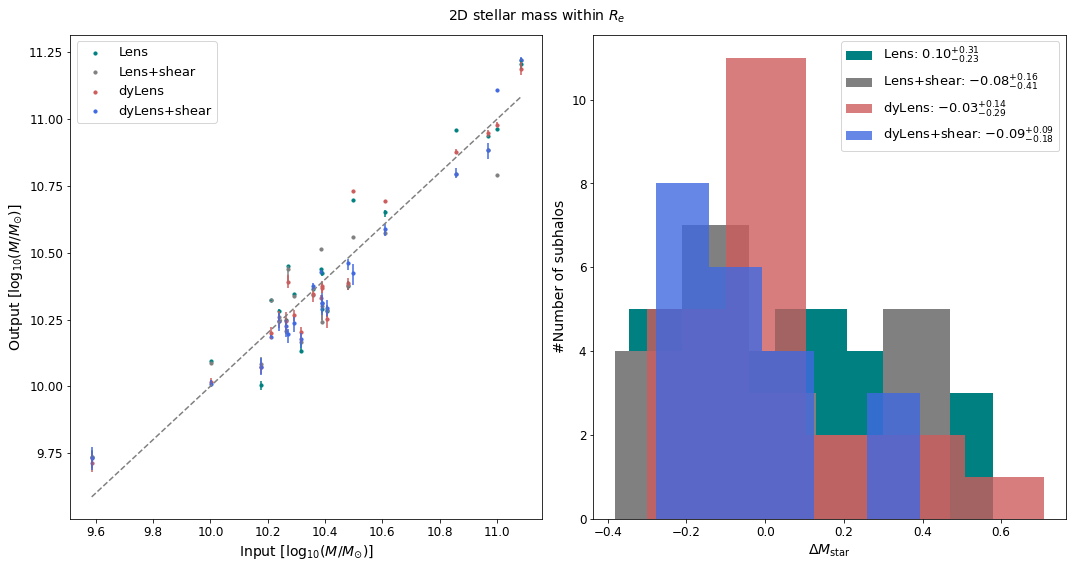

In [67]:
    # Stellar mass plot
make_plot(dataset_true=Mstar,
          dataset_Lens=MMstar_Lens, dataset_Lens_shear=MMstar_Lens_shear,
          dataset_dyLens=MMstar_dyLens, 
          dataset_dyLens_shear=MMstar_dyLens_shear,
          diff_dataset=Dstar,
         title=r"2D stellar mass within $R_{e}$", label=r"${\Delta M_{\rm star}}$")

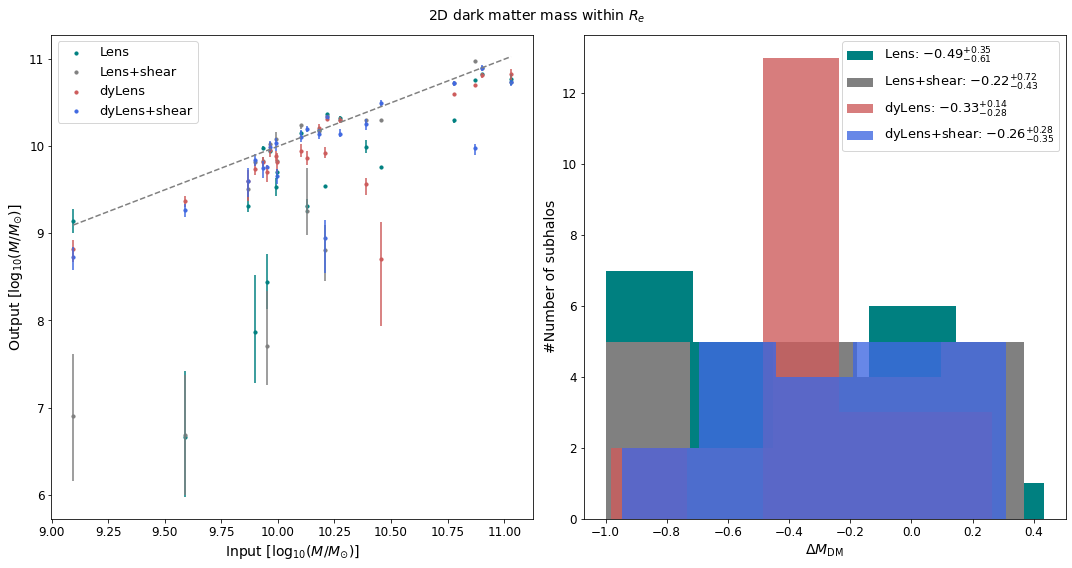

In [69]:
    # Dark matter mass
make_plot(dataset_true=Mdm,
          dataset_Lens=MMdm_Lens,
          dataset_Lens_shear=MMdm_Lens_shear,
          dataset_dyLens=MMdm_dyLens,
          dataset_dyLens_shear=MMdm_dyLens_shear,
          diff_dataset=Ddm,
         title=r"2D dark matter mass within $R_{e}$", label=r"${\Delta M_{\rm DM}}$")

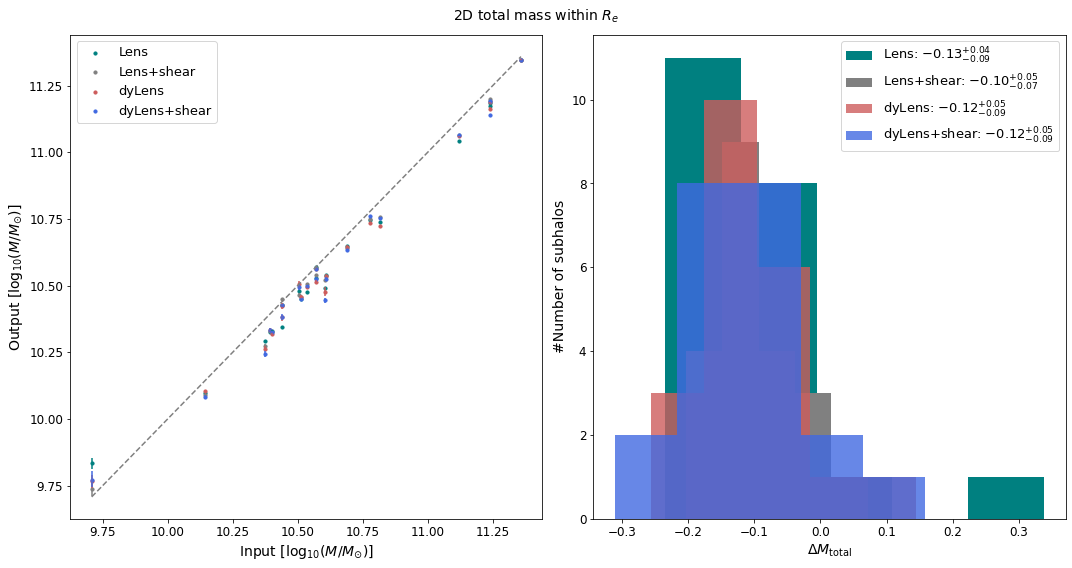

In [71]:
    # Total mass
make_plot(dataset_true=Mtotal,
          dataset_Lens=MMtotal_Lens, 
          dataset_Lens_shear=MMtotal_Lens_shear,
          dataset_dyLens=MMtotal_dyLens,
          dataset_dyLens_shear=MMtotal_dyLens_shear,
          diff_dataset=Dtotal,
         title=r"2D total mass within $R_{e}$", label=r"${\Delta M_{\rm total}}$")

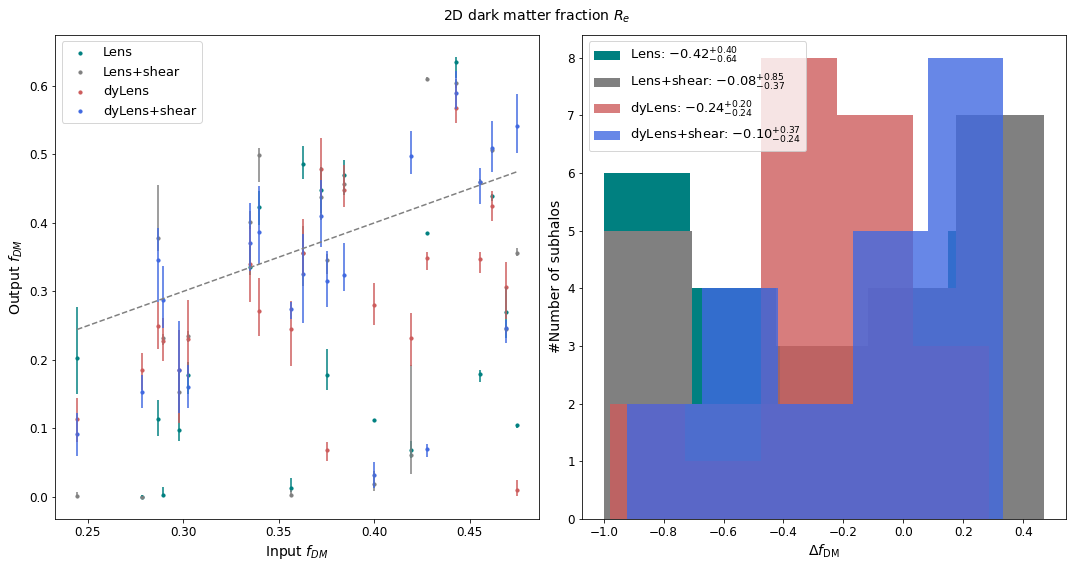

In [72]:
    # Dark matter fraction
make_plot(dataset_true=Mfdm,
          dataset_Lens=MMfdm_Lens, 
          dataset_Lens_shear=MMfdm_Lens_shear,
          dataset_dyLens=MMfdm_dyLens,
          dataset_dyLens_shear=MMfdm_dyLens_shear,
          diff_dataset=Dfdm,
         title=r"2D dark matter fraction $R_{e}$", label=r"${\Delta f_{\rm DM}}$", fdm=True)

In [73]:
results_2D = np.stack([Dstar, Ddm, Dtotal, Dfdm])

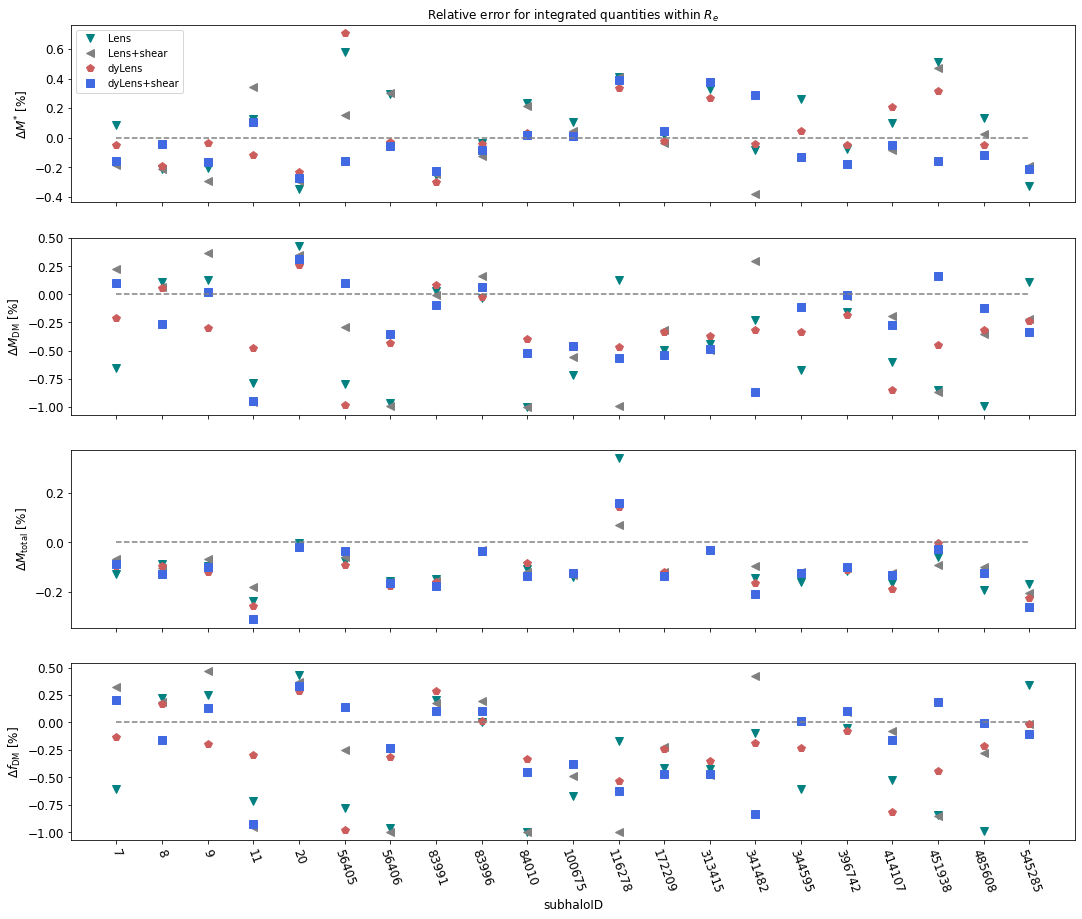

In [75]:
fig, axes = plt.subplots(4, figsize=(18, 15), sharex=True)
labels = [r"${\Delta M^{*}}$ [%]", r"${\Delta M_{\rm DM}}$ [%]",
         r"${\Delta M_{\rm total}}$ [%]", r"${\Delta f_{\rm DM}}$ [%]" ]
x = np.arange(0, Nsubhalos, 1)   # just to plot


for i in range(len(labels)):
    ax = axes[i]
    ax.set_xticks(x, subhalos)
    ax.plot(x, results_2D[i][:,1], "v", label="Lens", markersize=8, color="teal")
    ax.plot(x, results_2D[i][:,2], "<", label="Lens+shear", markersize=8, color="gray")
    ax.plot(x, results_2D[i][:,3], "p", label="dyLens", markersize=8, color="indianred")
    ax.plot(x, results_2D[i][:,4], "s", label="dyLens+shear", markersize=8, color="royalblue")
    ax.hlines(y=0, xmin=x.min(), xmax=x.max(), color="gray", linestyles="--")
    ax.set_ylabel(labels[i], size=12)
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[0].set_title("Relative error for integrated quantities within ${R_{e}}$")
axes[0].legend()
axes[-1].set_xlabel("subhaloID", size=12)
plt.xticks(size=12, rotation=-70)
plt.yticks(size=12);

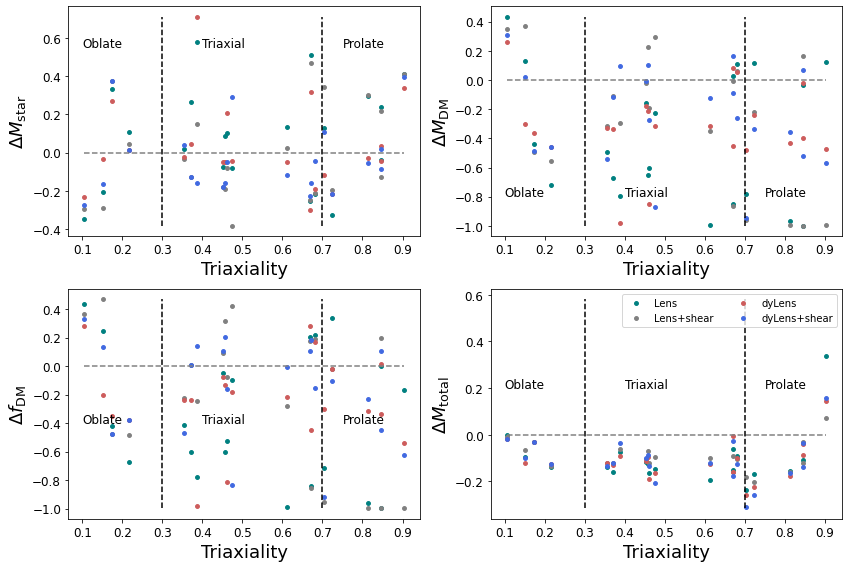

In [80]:
# Column 0 for Jam result, Column 1 for Lens, 2 for Lens+shear, 3 for dyLens, 4 dyLens+shear 

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
axs[0, 0].scatter(x=T, y=Dstar[:,1], s=15, color="teal", label="Lens")
axs[0, 0].scatter(x=T, y=Dstar[:,2], s=15, color="gray", label="Lens+shear")
axs[0, 0].scatter(x=T, y=Dstar[:,3], s=15, color="indianred", label="dyLens")
axs[0, 0].scatter(x=T, y=Dstar[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[0, 0].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[0, 0].set_xlabel('Triaxiality', size=18)
axs[0, 0].set_ylabel(r"${\Delta M_{\rm star}}$", size=18)

ymin = results_2D[0].min()
ymax = results_2D[0].max()

axs[0, 0].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 0].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 0].text(y=0.55, x=0.1, s='Oblate', size=12)
axs[0, 0].text(y=0.55, x=0.75, s='Prolate', size=12)
axs[0, 0].text(y=0.55, x=0.40, s='Triaxial', size=12)
#axs[0, 0].legend()

    # DM mass
axs[0, 1].scatter(x=T, y=Ddm[:,1], s=15, color="teal", label="Lens")
axs[0, 1].scatter(x=T, y=Ddm[:,2], s=15, color="gray", label="Lens+shear")
axs[0, 1].scatter(x=T, y=Ddm[:,3], s=15, color="indianred", label="dyLens")
axs[0, 1].scatter(x=T, y=Ddm[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[0, 1].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[0, 1].set_xlabel('Triaxiality', size=18)
axs[0, 1].set_ylabel(r"${\Delta M_{\rm DM}}$", size=18)

ymin = results_2D[1].min()
ymax = results_2D[1].max()

axs[0, 1].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 1].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[0, 1].text(y=-0.80, x=0.1, s='Oblate', size=12)
axs[0, 1].text(y=-0.80, x=0.75, s='Prolate', size=12)
axs[0, 1].text(y=-0.80, x=0.40, s='Triaxial', size=12)

 # DM fraction
axs[1, 0].scatter(x=T, y=Dfdm[:,1], s=15, color="teal", label="Lens")
axs[1, 0].scatter(x=T, y=Dfdm[:,2], s=15, color="gray", label="Lens+shear")
axs[1, 0].scatter(x=T, y=Dfdm[:,3], s=15, color="indianred", label="dyLens")
axs[1, 0].scatter(x=T, y=Dfdm[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[1, 0].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[1, 0].set_xlabel('Triaxiality', size=18)
axs[1, 0].set_ylabel(r"${\Delta f_{\rm DM}}$", size=18)

ymin = results_2D[3].min()
ymax = results_2D[3].max()

axs[1, 0].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 0].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 0].text(y=-0.4, x=0.1, s='Oblate', size=12)
axs[1, 0].text(y=-0.4, x=0.75, s='Prolate', size=12)
axs[1, 0].text(y=-0.4, x=0.40, s='Triaxial', size=12)


 # Total mass
axs[1, 1].scatter(x=T, y=Dtotal[:,1], s=15, color="teal", label="Lens")
axs[1, 1].scatter(x=T, y=Dtotal[:,2], s=15, color="gray", label="Lens+shear")
axs[1, 1].scatter(x=T, y=Dtotal[:,3], s=15, color="indianred", label="dyLens")
axs[1, 1].scatter(x=T, y=Dtotal[:,4], s=15, color="royalblue", label="dyLens+shear")
axs[1, 1].hlines(y=0, xmin=min(T), xmax=max(T), color="gray", linestyles="--")
axs[1, 1].set_xlabel('Triaxiality', size=18)
axs[1, 1].set_ylabel(r"${\Delta M_{\rm total}}$", size=18)
axs[1, 1].legend(ncol=2)


ymin = results_2D[2].min()
ymax = results_2D[2].max()

axs[1, 1].vlines(x=0.3, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 1].vlines(x=0.7, ymin=ymin, ymax=ymax, color="black", linestyles="--")
axs[1, 1].text(y=0.2, x=0.1, s='Oblate', size=12)
axs[1, 1].text(y=0.2, x=0.75, s='Prolate', size=12)
axs[1, 1].text(y=0.2, x=0.40, s='Triaxial', size=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

----